In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [9]:
y = df['species']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model_rfc = RandomForestClassifier(n_estimators=10,max_features='auto', oob_score= True, random_state=101)

In [14]:
model_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=101)

In [15]:
y_pred = model_rfc.predict(X_test)

In [16]:
from sklearn.metrics import plot_confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


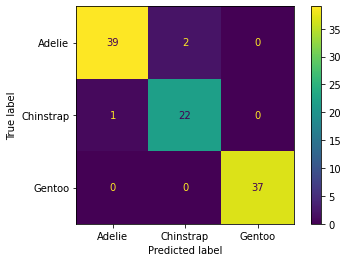

In [17]:
plot_confusion_matrix(model_rfc, X_test, y_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



<h1> Random forest classifier for big dataset </h1>

In [19]:
df_note = pd.read_csv('data_banknote_authentication.csv')

In [20]:
df_note.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


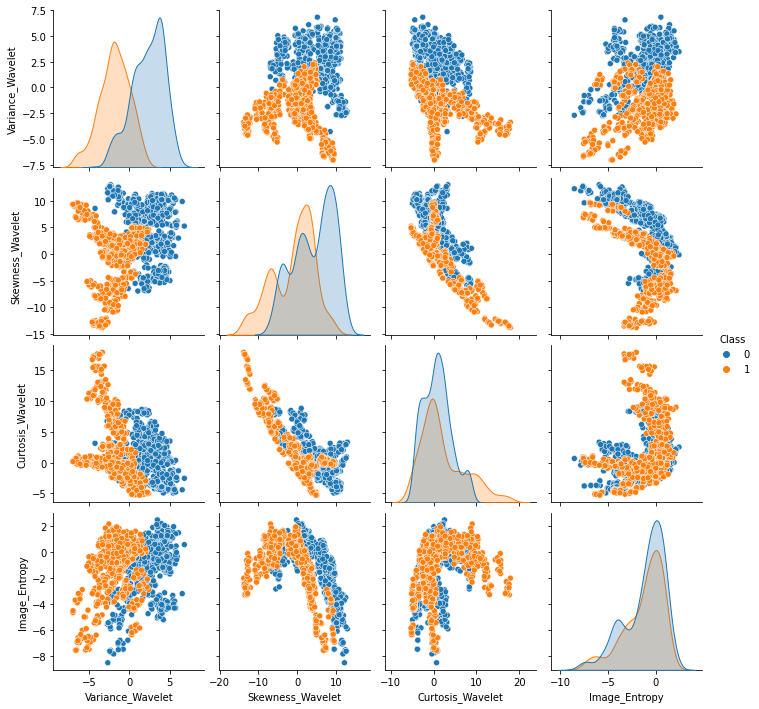

In [43]:
# PAirplot to show the relationship between the features and target

sns.pairplot(df_note, hue='Class')

In [22]:
X = df_note.drop('Class', axis=1)

In [23]:
y = df_note['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.30, random_state=101)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Hyperparameters used in random forest classifiers.
# To know the best possible parameters.

n_estimators = [100, 250, 300, 350]
max_features = [1,2,3]
bootstrap = [True, False]
oob_score = [True, False]

In [28]:
# Creating a parameter Grid to feed it to GridSearchCV

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap' : bootstrap,
              'oob_score' : oob_score }

In [29]:
model_rfc_2 = RandomForestClassifier()

In [30]:
gridCV = GridSearchCV(model_rfc_2, param_grid)

In [31]:
gridCV.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/p

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [1, 2, 3],
                         'n_estimators': [100, 250, 300, 350],
                         'oob_score': [True, False]})

In [38]:
# it can predict best possible outcomes for the parameter.

gridCV.best_params_

{'bootstrap': True, 'max_features': 1, 'n_estimators': 250, 'oob_score': False}

In [39]:
# Now we have to use paramter value obtained in RandomForest Classifier to get better output

model_rfc_3 = RandomForestClassifier(bootstrap= True, max_features= 3, n_estimators= 250,)

In [41]:
model_rfc_3.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=250)

In [42]:
# Pediction

y_pred_rfc_3 = model_rfc_3.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


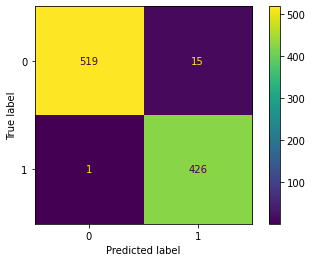

In [36]:
plot_confusion_matrix(model_rfc_3, X_test, y_test)

In [37]:
print(classification_report(y_test, y_pred_rfc_3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       534
           1       0.97      1.00      0.98       427

    accuracy                           0.98       961
   macro avg       0.98      0.98      0.98       961
weighted avg       0.98      0.98      0.98       961

